In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Plan for this afternoon

* Numpy
    * Working with arrays
* Scipy
    * Fitting curves

## Numpy

Numpy is one of the most widely used Python libraries for scientific computing. 
Almost (if not all) Python programs that you will write will make use of Numpy.
The Numpy website has provided some examples of scientific research projects that used Numpy:

* First image of a Black Hole: https://numpy.org/case-studies/blackhole-image/
* Discovery of Gravitational Waves: https://numpy.org/case-studies/gw-discov/

Among the things you can do with Numpy are:

* Mathematical and logical opreations on arrays
* Fourier transforms
* Linear algebra operations


#### What is an array?

We can think of an array as a vector or a list of numbers. 

For example, let's imagine that you throw a ball from the top of a building (height $y_{o}= 80m$) with a horizontal velocity of $v_{o,x}=5m/s$. You would like to model the position (vertical and horizontal displacement) of the ball as a function of time. Let's ignore air-resistance for now and recall $g=9.81 m/s^{2}$.

Using kinematics equations for constant acceleration and constant velocity, we have that the horizontal and vertical positions of the ball are given by the following equations:

$y(t) = y_{o} - \frac{1}{2}gt^{2}$ 


$x(t) = v_{o,x}t $


We can pick a time, say $t=2s$ and calculate the vertical and horizontal positions at that time. If we are very motivated, we can try to do the same for five different times. But what if we wanted to know the positions at 100 diferent times? Doing the calculation again and again for each time value is tedious!

Let your computer do the boring (and repetitive) work by using Numpy.

First, let's assume you would like to know the positions for all the time values between 0 an 4 seconds in increments of 0.1 seconds, i.e. $[0,0.1,0.2,...3.9,4.0]$. You can create a numpy array, which is just a list of numbers:

In [35]:
t_array = np.arange(0,4.1,0.1)

In the line above, the first number is the start of the list, the second number is the end and the third number is the step size.
This is what t_array looks like:

In [36]:
print(t_array)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


Now, let's create variables for all the other quantities in this kinematics problem. The variables are just single numbers, not arrays.

In [37]:
g = 9.81 #m/s^2  GRAVITY
y_0 = 80 #m      BUILDING HEIGHT
v_x0 = 5 #m/s    HORIZONTAL VELOCITY OF THE BALL

Recall, to calculate the horizontal displacement of the ball we need to use this equation:

$x(t) = v_{o,x}t $ 

To implement this using Numpy, we multiply the time array by the horizontal velocity variable and store the result in a different array:

In [38]:
x_array = v_x0 * t_array

What does x_array look like?

In [39]:
print(x_array)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20. ]


x_array is also a list (an array) of numbers. What did we do when we multiplied v_x0 by t_array? We just multiplied each element in the time array by the velocity.

You can also square each element of an array as follows:

In [40]:
a = np.arange(0,5,1)
a_squared = a**2  #This is how you square an array

print("a = ",a ,"\na^2=",a_squared )



a =  [0 1 2 3 4] 
a^2= [ 0  1  4  9 16]


Finally, you can also add or subtract the same number to each of the elements in an array:

In [41]:
b = np.arange(0,10,1)
n = 2.3 #this is the number we want to add (or subtract)
b_minus_n = b-n 
b_plus_n = b+n

print("b = ",b,"\nb+n = ", b_plus_n)
print("b = ",b,"\nb-n = ", b_minus_n)


b =  [0 1 2 3 4 5 6 7 8 9] 
b+n =  [ 2.3  3.3  4.3  5.3  6.3  7.3  8.3  9.3 10.3 11.3]
b =  [0 1 2 3 4 5 6 7 8 9] 
b-n =  [-2.3 -1.3 -0.3  0.7  1.7  2.7  3.7  4.7  5.7  6.7]


#### Exercise 

Now is your turn to use arrays to calculate the vertical displacement of the ball from times 0 to 4 seconds (in steps of 0.1 seconds) using the following formula:

$y(t) = y_{o} - \frac{1}{2}gt^{2}$ 

Recall, we had already stored the variables for $y_{o}$ and $g$ above so there is no need to declare this variables again. Scroll back up and find the code block where we declared these variables.

Recall also, we already made an array for time and called it t_array.

(store the vertical displacement of the ball as an array called y_array).

In [2]:
###Your code goes here ####

Sanity check. The path that a ball falling from the building with an initial horizontal velocty is a parabola. How can we check if the horizontal and vertical displacements of the ball indeed follow that trajectory?

Let's plot them (no worries if the following piece of code does not make sense, we will go over how to plot arrays later this week).

Text(0.5, 1.0, 'Parabolic motion of the ball')

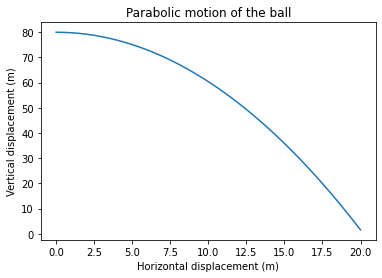

In [ ]:
plt.plot(x_array,y_array)
plt.xlabel("Horizontal displacement (m)")
plt.ylabel("Vertical displacement (m)")
plt.title("Parabolic motion of the ball")

### Array indexing and slicing

So far we have only seen examples where we multiply an array by a single number, or where we add or subtract one number to each element in an array. 
|
However, it is possible to add an array to another, or multiply two arrays with each other.

The only requirement is that both arrays need to have the same length or shape. What do we mean by shape? Well, arrays be 2 dimensional. For example:

In [74]:
data=np.array([[1,2],[3,4],[5,6]])
print(data)

[[1 2]
 [3 4]
 [5 6]]


This array has a shape of (3,2), in other words, 3 rows and 2 columns. 

In [75]:
print("shape of data array =",data.shape)

shape of data array = (3, 2)


To access specific elements in the array we use indexing. When indexing, we use the row and column numbers of the element we want to access.

In Python, we begin numbering stuff with 0. So the first column is "column 0", the second column is "column 1" and so on. The same is for rows.

For example, if we wanted to access the element that contains number 2 in the data array, we would index it with row = 0 (first row), column = 1 (second column).

In [77]:
print(data[0,1])

2


We an also access several elements at once. For example, if we wanted to access all the elements starting from the second row (row=1), we would do the following:

In [83]:
data[1:3] #access everything from row 1 till row 3 

array([[3, 4],
       [5, 6]])

If in turn, we wanted to access the first two elements in column 0, we would do the following:

In [84]:
data[0:2,0]

array([1, 3])

We can visualize this array and the indexing example with this diagram:

![Cat](images/numpy-matrix-indexing.png)

#### Exercise

Write code to access number 3 in the data array.

In [85]:
###HERE GOES YOUR CODE

#### Exercise

Write code to access numbers 4 and 6 in the data array.

In [ ]:
###HERE GOES YOUR CODE

#### Exercise

Write code to access numbers 1,2,3,4 in the data array.

In [86]:
###HERE GOES YOUR CODE

Some very useful python functions that you cna use to figure out the length and shape of an array are:

In [117]:
len(data) ##length

3

In [118]:
data.shape ##shape

(3, 2)

### Adding arrays

So far, we saw an example where we added the same number to each element in an array. We can also take two arrays (say array A and array B) of the same length and add them. Numpy will add the first element of array A to the first element of array B and so on. To see this in action, let's work through an example.


Imagine that you have two waves with different frequency and a phase offset between them:

$ y_{1}(t) = A \sin(\omega_{1} t)$

$ y_{2}(t) = A \sin( \omega_{2} t + \phi) $

where $A = 4$,$\omega_1 = 4 rad s^{-1}$, $\omega_2 = 5 rad s^{-1}$ and $\phi = 2/6 rad$

How can we model their interference? 

We can add the two waves!

$ y_{total}(t) = y_{1}(t) + y_{2}(t)$

But what does that actually look like?

Let's make arrays to understand what these waves look like. First we will need to create arrays for the x (position) and t (time) variables. Let's also create variables for $k$, $\omega$ (omega) and $\phi$ (phi):

In [108]:
t_arr = np.linspace(0,10,1000)
omega_1 = 4 #per second
omega_2 = 5 #per second
phi = 2/6
A = 4

In [109]:
y_1 = A* np.sin(omega_1*t_arr)

In [110]:
y_2 = A* np.sin(omega_2*t_arr + phi )

#### Exercise

Plot the two waves above. Use the plot for the parabolic motion of the ball above as an example 

In [4]:
###HERE GOES YOUR CODE


We can add $y_{1}(t)$ and $y_{2}$ to create $y_{total}(t)$. 

#### Exercise
Can you think of a way to add these two waves? Add them and plot the result!

In [5]:
###HERE GOES YOUR CODE


## Scipy

Scipy is also a very popular python library with lots of useful functions for solving mathematics, science and engineering problems. It consists of several sub-packages like:

* scipy.linalg : For linear algebra operations
* scipy.interpolate : To interpolate functions
* scipy.optimize : To do fit functions to a curve
* scipy.stats : To do statistics and probability
* scipy.integrate : To do integrals
* scipy.fftpack : To do Fourier Transforms

We won't go into each of these packages this week, just know that they exist and that if you ever need to perform advanced mathematical operations on your data, there probably already exists a scipy package or function that can help you.
Go to this website to find all the documentation on the different scipy sub-packages: https://docs.scipy.org/doc/scipy/tutorial/index.html

### Fitting a curve to some data

One of the most common tasks that you will have to perform when working with data is to fit a curve.
Let's imagine you have some data on the position of an object that is moving with some constant velocity as a function of time. You don't know what that velocity is, all you have is data on the position of the object at different times.
How can you figure out what the velocity of the object is? You can fit a line through the data, and the slope will give you the velocity.

Recall, the "generic" form for a linear function is:

$y = mx+c$

In our case:

$ x(t) = vt + x_{0}$




In [11]:
time = np.linspace(0,10,100)
xdata = np.array([10.58300139, 11.20299179, 11.3776619 , 12.46331714, 12.27013051,
       13.44423306, 13.90545522, 13.70487429, 14.95319392, 15.52549468,
       15.4696867 , 15.73120858, 16.97499688, 17.50735341, 17.10952245,
       18.09921669, 18.6857602 , 19.22399236, 19.48568773, 19.80453577,
       20.96473383, 21.38636198, 21.35798152, 21.61861146, 22.24043612,
       22.99765071, 23.33222685, 24.54157767, 24.47472585, 25.26551936,
       25.97541624, 26.26659371, 26.30083227, 26.97135341, 27.26487868,
       28.28404256, 29.12999202, 29.65459072, 29.35755752, 30.59118279,
       31.18645779, 31.24682189, 31.4483792 , 32.69714176, 32.81549072,
       33.15025283, 33.24986186, 34.37748647, 34.69458478, 35.54626364,
       35.80227685, 35.9546315 , 36.63220587, 37.48230868, 37.31110654,
       38.56172932, 38.82215714, 39.59823446, 39.54865026, 40.7968092 ,
       40.88269228, 40.85270662, 41.78438194, 42.15440229, 42.6579111 ,
       43.05380244, 43.75177574, 43.86197173, 44.41026783, 45.22127886,
       46.12617931, 46.39211941, 46.95953449, 47.32348616, 47.95286801,
       48.82542706, 49.30608968, 49.14453117, 49.87050112, 50.17033371,
       51.02673895, 51.77058036, 51.98745453, 52.15983499, 52.53778002,
       53.25227534, 54.19756641, 54.62438118, 54.95288642, 55.72880148,
       56.16751933, 56.48150541, 57.40554555, 56.98532479, 57.63944981,
       58.57461007, 58.56996881, 59.33299303, 59.95250963, 60.14625871])

#### Exercise

Make a plot of the data above:

In [6]:
##HERE GOES YOUR CODE


In order to fit a line to this data, we first have to make a python function for the model we want to fit. Our model is a linear function so the python function looks like this:

In [16]:
def linear_func(x,m,c):
    y = m*x + c
    return y

Notice, in the function above, x refers to the independent variable, and it should be the first argument in the model function. m and c are the two parameters we want to fit, in other words the slope and the y-intercept.

We also need to import the correct python scipy subpackage. There are several routines that can help us fit a curve to some data, today we will use scipy.optimize.curve_fit

In [17]:
from scipy.optimize import curve_fit

The "curve_fit" routine available in scipy.optimize takes in several parameters. The first parameter is the model (in our case "linear_func"), then the array of independent variables (the time array) and finally the array of dependent variables (the position array).

In [22]:
popt,pcov = curve_fit(linear_func,time,xdata)

What do we get when we run the code above? We obtain two arrays, which we are saving under the variable names "popt" and "pcov".

* popt contains the best fit parameters, in other words, the slope (velocity) and y-intercept (initial position)

* pcov is a covariance matrix. The square root of the diagonal matrix gives us the errors for the parameter values we fit. 

This is what the popt and pcov arrays look like

In [24]:
popt

array([ 4.98664743, 10.57293962])

In [25]:
pcov

array([[ 0.00010277, -0.00051384],
       [-0.00051384,  0.00344287]])

The result of our fitting routine is the following:

In [36]:
print("v =", popt[0], "+/-", pcov[0,0]**0.5)
print("x_0 =", popt[1], "+/-", pcov[1,1]**0.5)

v = 4.986647429663174 +/- 0.01013740775568077
x_0 = 10.572939615907035 +/- 0.05867596352151449


Let's use these parameters to make an array for the fit, and the plot the data and the fit.

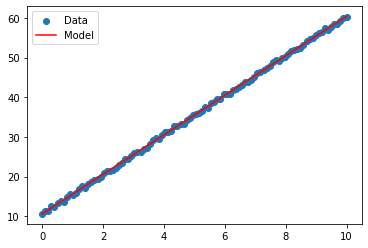

In [41]:
v = popt[0]
x0 = popt[1]
x_model = popt[0]*time + x0

plt.scatter(time,xdata,label = "Data")
plt.plot(time,x_model,c="r",label="Model")
plt.legend()

#### Exercise
Fit a quadratic function to the following two arrays (x_arr and y_arr):

$ y = ax^{2} + bx + c $

In [7]:
x_arr = np.linspace(0,10,100)
y_arr = np.array([  5.53853803,   5.97049541,   5.96225685,   7.08878928,
         7.35990182,   8.57877691,   9.14377365,  10.17656477,
        10.80116861,  12.03100599,  12.95076638,  13.60215241,
        14.43027515,  16.16829   ,  16.88891786,  18.66685743,
        19.73612093,  21.24909573,  22.85547982,  24.34633365,
        26.12924046,  27.59136355,  28.95670041,  31.09493401,
        32.66042573,  35.05481651,  36.64550766,  38.57482985,
        40.93533822,  43.1293315 ,  45.55410537,  47.36931447,
        49.87059578,  52.04865137,  55.01357761,  57.46163221,
        60.02266233,  62.22463278,  64.80705338,  67.66505781,
        71.04662162,  73.61363271,  76.38774633,  79.88609505,
        82.8785628 ,  85.76927677,  88.758893  ,  92.54053963,
        95.610144  ,  98.54566174, 101.92332556, 105.32447143,
       109.06311004, 113.31124921, 116.12499984, 119.86055204,
       124.56642734, 128.33177721, 131.95251586, 135.61500643,
       139.46964696, 144.17884711, 147.79037765, 152.65697307,
       156.65527903, 160.73017237, 165.01634065, 170.4040761 ,
       174.23551625, 178.99769033, 183.27639014, 188.04238224,
       192.86005893, 198.4586194 , 203.24223055, 208.2331231 ,
       212.68833606, 217.81714927, 223.28398909, 228.36357935,
       233.40946014, 239.1022659 , 244.93143314, 249.82023349,
       255.57822032, 261.46911286, 267.12932363, 271.89628667,
       278.32360806, 283.76451468, 289.55501112, 295.49391108,
       302.16446637, 307.79918405, 314.320522  , 320.27729561,
       325.93967841, 332.91179142, 339.30817068, 345.80403133])